In [1]:
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dir_data = './Data/home-credit-default-risk/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(65499, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(65499, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# 觀察相關係數
total_corr=app_train.corr()['TARGET']
total_corr.dtype

dtype('float64')

In [16]:
#負相關前15筆資料
total_corr.sort_values().head(15)


EXT_SOURCE_3                 -0.175988
EXT_SOURCE_2                 -0.159020
EXT_SOURCE_1                 -0.155680
FLOORSMAX_AVG                -0.041809
AMT_GOODS_PRICE              -0.041401
REGION_POPULATION_RELATIVE   -0.041367
FLOORSMAX_MEDI               -0.041112
FLOORSMAX_MODE               -0.040567
DAYS_EMPLOYED                -0.040069
FLOORSMIN_AVG                -0.034161
ELEVATORS_AVG                -0.034089
FLOORSMIN_MEDI               -0.033590
ELEVATORS_MEDI               -0.033523
FLOORSMIN_MODE               -0.033084
HOUR_APPR_PROCESS_START      -0.032576
Name: TARGET, dtype: float64

In [15]:
#正相關前15筆資料
total_corr.sort_values( ascending=False).head(15)

TARGET                         1.000000
DAYS_BIRTH                     0.077806
REGION_RATING_CLIENT           0.064185
REGION_RATING_CLIENT_W_CITY    0.063667
DAYS_LAST_PHONE_CHANGE         0.055092
DAYS_ID_PUBLISH                0.048878
REG_CITY_NOT_WORK_CITY         0.045560
FLAG_DOCUMENT_3                0.043489
DEF_60_CNT_SOCIAL_CIRCLE       0.042546
DAYS_REGISTRATION              0.041782
FLAG_EMP_PHONE                 0.041158
DEF_30_CNT_SOCIAL_CIRCLE       0.041116
REG_CITY_NOT_LIVE_CITY         0.037455
OWN_CAR_AGE                    0.035580
LIVE_CITY_NOT_WORK_CITY        0.029556
Name: TARGET, dtype: float64

In [23]:
app_train.loc[app_train['EXT_SOURCE_3'].isnull(), 'EXT_SOURCE_3'] = app_train['EXT_SOURCE_3'].mean()

x=list(app_train['EXT_SOURCE_3'])
y=list(app_train['TARGET'])
np.corrcoef(x,y)


array([[ 1.        , -0.15491627],
       [-0.15491627,  1.        ]])

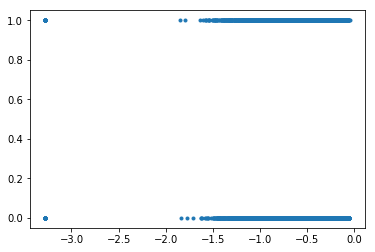

In [29]:
plt.plot(np.log10(app_train['EXT_SOURCE_3']) , app_train['TARGET'], '.')